In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [57]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Passenger Id e dados duplicados

In [59]:
# PassengerId nao acrescenta informacoes ao nosso dataset
# portanto vamos dropa-la e checar para dados duplicados
def trataColunaPassengerId(df):
    df.drop(columns = ["PassengerId"], axis = 1, inplace=True)
    return 

trataColunaPassengerId(train_df)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
# Checar se ha duplicados
train_df.drop_duplicates(ignore_index=True)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Survived

In [61]:
# Checa se os valores estao conforme esperados
train_df["Survived"].unique()

array([0, 1])

## Pclass
Esse atributo representa a classe do tiquete do passageiro, com:
* 1 - Primeira classe;
* 2 - Segunda classe;
* 3 - Terceira classe. 


In [62]:
train_df["Pclass"].unique()

array([3, 1, 2])

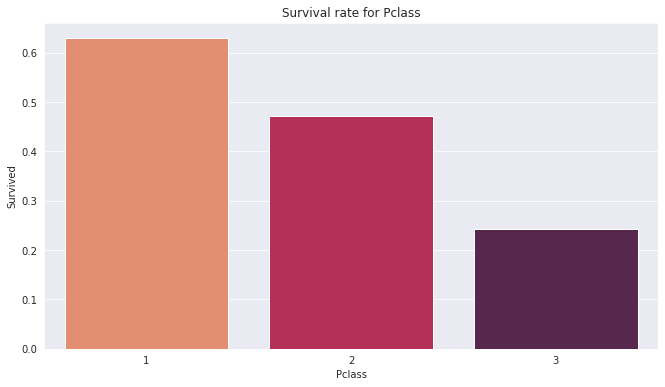

In [63]:
def grafico_de_barras_sobrevivencia(df, column):
    """
    Funcao que plota um grafico para a taxa de sobrevivencia 
    de acordo com a coluna categorica passada
    """
    taxa_grupos = df.groupby(column)[["Survived"]].mean()

    fig, ax = plt.subplots(figsize = (11,6)) 
    ax = sns.barplot(x=taxa_grupos.index, y = taxa_grupos["Survived"], palette = "rocket_r")
    ax.set_title("Survival rate for "+ column)
    return 

grafico_de_barras_sobrevivencia(train_df, "Pclass")

Pode se notar que a classe do passageiro influe fortemente sobre a taxa de sobrevivencia. Isso acaba indicando que passageiros provenientes de maiores classes sociais foram privilegiados na hora do embarque

## Sex

In [64]:
# Analise simples
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

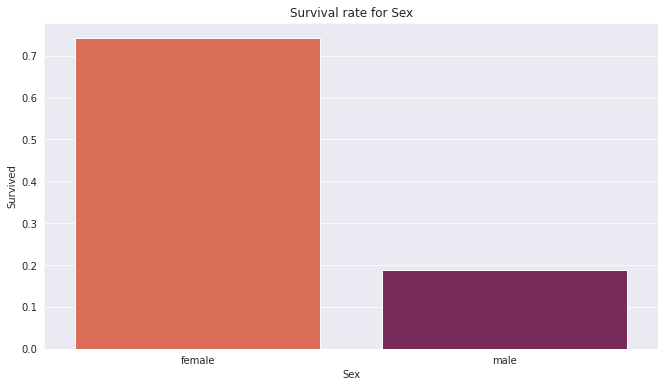

In [65]:
grafico_de_barras_sobrevivencia(train_df, "Sex")

Pode-se notar que as mulheres apresentaram uma maior taxa de sobrevivencia quando comparado aos homens. Isso indica que durante o embarque nos botes elas tinham preferencia.

## Age
Para o atributo da idade, ja foi possivel perceber que ele apresenta alguns valores nulos. Para isso vamos primeiro analisar a distribuicao dos valores nao nulos e substituir os valores nulos por uma distribuicao normal com media e variancia adequadas

In [68]:
train_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [44]:
# Replace NaNs in Age with a normal distribution
train_df_age_nan = train_df[train_df["Age"].isna()]["Age"]
n = train_df_age_nan.size
mean_age = train_df["Age"].mean()
std_age  = train_df["Age"].std()
age_missing_values = np.random.normal(mean_age, std_age, n)
train_df.loc[train_df["Age"].isna(), "Age"] = age_missing_values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


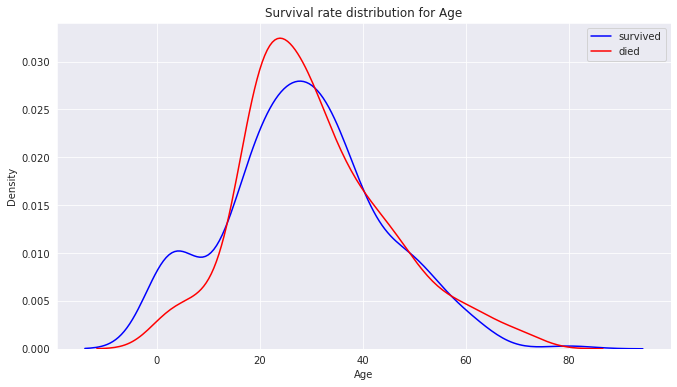

In [87]:
def displot_sobrevivencia(df, column):
    """
    Funcao que plota um grafico para a distribuicao da
    taxa de sobrevivencia de acordo com a coluna numerica passada
    """
    fig, ax = plt.subplots(figsize = (11,6))
    
    sns.kdeplot(data = df[df["Survived"]==1], x=column, ax = ax, label = "survived", color = "blue")
    sns.kdeplot(data = df[df["Survived"]==0], x=column, ax = ax, label = "died", color = "red")
    ax.legend()
    
    ax.set_title("Survival rate distribution for "+ column)
    return 
displot_sobrevivencia(train_df, "Age")

Percebe-se que a distribuicao das idades para os sobreviventes apresenta uma maior concentracao para a idade de criancas, demonstrando que houve uma certa preferencia para esse grupo no embarque. 

In [26]:
train_df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [27]:
train_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [28]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [29]:
train_df["Cabin"].head(20)

PassengerId
1      NaN
2      C85
3      NaN
4     C123
5      NaN
6      NaN
7      E46
8      NaN
9      NaN
10     NaN
11      G6
12    C103
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
Name: Cabin, dtype: object

In [8]:
# Desinverte um texto, segundo o algorítimo fornecido. Note que inverter e desinverter é o mesmo processo.
#Entrada: string é uma string, representando o texto a ser invertido.
#Saida: texto é a string desinvertida.
def desinverte(string):
    comprimento = len(string)
    # n é 1 + o piso da metade do comprimento do texto.
    n = (comprimento)//2
    
    #Desinverte a primeira metade (Vai de (n-1) até 0)
    texto = string[n-1::-1]
    
    #Se o comprimento é ímpar, adiciona o digito do meio.
    #Desinverte a segunda metade (Vai de -1 até -(n+1))
    texto += string[:n-1:-1]
    
    return texto


#Aplica a função desinverte em uma lista de emails, caso não haja erros, retorna a lista invertida. No caso de erros é retornada "ERRO" ao inves do email desinvertido.
#Entrada: lista é uma lista de strings, com as strings sendo os emails a serem desinvertidos.
#Saida: nova_lista é uma lista de strings, com as strings sendo ou os emails corrigidos ou "ERRO" no caso do email possuir um erro mesmo quando corrigido.
def corrige_emails(lista):
    nova_lista = []
    
    #Para cada email na lista, desinverta-o e verifique se há um erro pra adiciona-lo na nova_lista
    for email in lista:
        email_corrigido = desinverte(email)
        
        #Se a terminação do email não for "@usp.br", ele sera considerado um ERRO.
        if email_corrigido[-7:]=="@usp.br":
            nova_lista += [email_corrigido]
            
        else: nova_lista += ["ERRO"]
    
    return nova_lista


#testa exemplos
l=["otsip.knazarb.psu@odal",
   "ibol.alimacrb.psu@ocna",
   "t.alalalimacrb.repsu@ppo",
   ".orbmem_ovonrb.psu@gnirut"]
print(corrige_emails(l))

# Obs: O email ".orbmem_ovonrb.psu@gnirut" possui 25 caracteres, e portanto sua letra do meio deve ser mantida.
# Mas sendo dessa forma, ele será distinto do exemplo fornecido. Considerarei que foi um erro no enunciado.
# Cheque abaixo:
print(desinverte(".orbmem_ovonrb.psu@gnirut"))

['azank.pistolado@usp.br', 'camila.lobianco@usp.br', 'ERRO', 'novo_membro.turing@usp.br']
novo_membro.turing@usp.br


In [ ]:
#Definindo uma classe estacionamento. 
class estacionamento:
    #Iniciação envolve 3 entradas que serão salvas internamente no estacionamento:
    def __init__(self,tamanho, vagas = [] , debug = False):
        self.tamanho = tamanho #tamanho é um inteiro representando o tamanho do estacionamento
        self.vagas = vagas     # vagas é uma lista reprensentado a situação inicial de ocupação no estacionamento
        self.debug = debug     #debug é um boolean que quando True, printa as vagas no final de todo método
    
    #Os métodos entrada e saida retornam 0 caso falhem a executar, e 1 caso não haja problemas.    
    
    #Método entrada, adiciona um carro (variável int) em vagas, caso o estacionamento não esteja lotado (tamanho de vagas == tamanho) 
    def entrada(self,carro):
        if len(self.vagas) == self.tamanho:
            return 0
        
        self.vagas += [carro]
        
        if self.debug: print(self.vagas)
        return 1
    
    #Método saida, caso o carro no sentido de saida seja o carro a ser removido, remove o carro do estacionamento (lista de vagas)
    def saida(self,carro, sentido):
        if self.vagas[sentido] != carro:
            return 0
        
        self.vagas.pop(sentido)
        if self.debug: print(self.vagas)
        return 1
    
    #Método avança remove o carro da posição -1 da lista de vagas, e adiciona carro no inicio da lista de vagas.
    #Saida: retorna a situação atual de vagas
    def avança(self,carro):
        self.vagas.pop(-1)
        self.vagas = [carro] + self.vagas
        
        if self.debug: print(self.vagas)
        return self.vagas


def estacionamento_ok(tamanho,registro):
    
    #Cria um estacionamento com debug falso (mude para True caso quiser ver etapa a etapa)
    est = estacionamento(tamanho, debug = False)
    
    #Para cada carro no registro, verifica-se se é uma entrada ou saida, executa a ação. Caso a ação seja ilegal, a função retorna 0 e um "nao" é retornado interrompendo a função estacionamento_ok.
    for carro in registro:
        
        #Entrada
        if carro>0:
            if est.entrada(carro) == 0:
                return "nao"
        
        #Saida
        if carro<0:
            if est.saida(-carro, -1) == 0:
                return "nao"
    
    #Se a função executou sem problemas, retorna "sim"
    return "sim"

#Exemplos fornecidos
print(estacionamento_ok(3,[1,2,-2,3,-3,-1]))
print(estacionamento_ok(3,[1,2,-2,3,5,-3,-1,-5]))